In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [3]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
data.shape

(3999, 12)

In [5]:
# Renaming columns
data = data.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [6]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# As we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  data.drop(['ID','Award'], axis=1)
dataset1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [8]:
# checking for duplicated and null values in the dataset
dataset1[dataset1.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
3370,1000,0,1,1,1,0,0,0,0,1597
3876,1000,0,1,1,1,0,0,0,0,1597


In [9]:
# dropping the duplicated column
dataset1 = dataset1.drop_duplicates(keep="first")

In [10]:
dataset1.shape

(3998, 10)

In [11]:
# checking for null values
dataset1[dataset1.isnull().any(axis=1)]
# No null values found

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


In [12]:
# Outlier detection is not required as clustering methods handle the outlier during processing.
#I am using two transformation.since to ckeck how cluster numbers vary with different transformation.
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3998, 10)

In [13]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3998, 10)

In [14]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [15]:
# eigenvalues..

print(pca_std.singular_values_)

[110.42019119  83.10528282  64.82005475  63.48127846  61.95865851
  60.17600659  51.81850008  38.09660342]


In [16]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.49679495 17.27485751 10.50935342 10.07972165  9.6019894   9.05740813
  6.7162505   3.63019308]


In [17]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
# variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance
# Conclusion:
# by applying PCA on standardized data with 95% variance it gives 8 PCA components.

array([30.49679495, 47.77165246, 58.28100588, 68.36072753, 77.96271693,
       87.02012506, 93.73637556, 97.36656864])

In [18]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [19]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30351881 14.97926889  6.73604146  4.71017429  4.35528386]


In [20]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

# Conclusion:
# By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

[60.46815747 24.98417197  5.05234769  2.47034541  2.11211061]


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

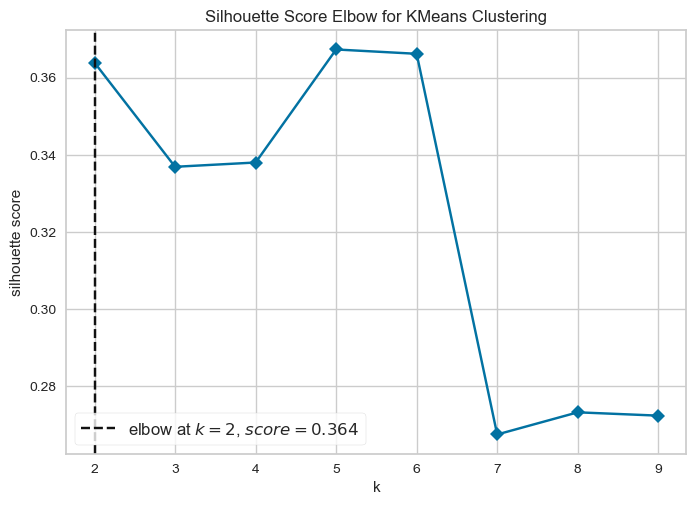

Model 1 results:
12276.617228659456


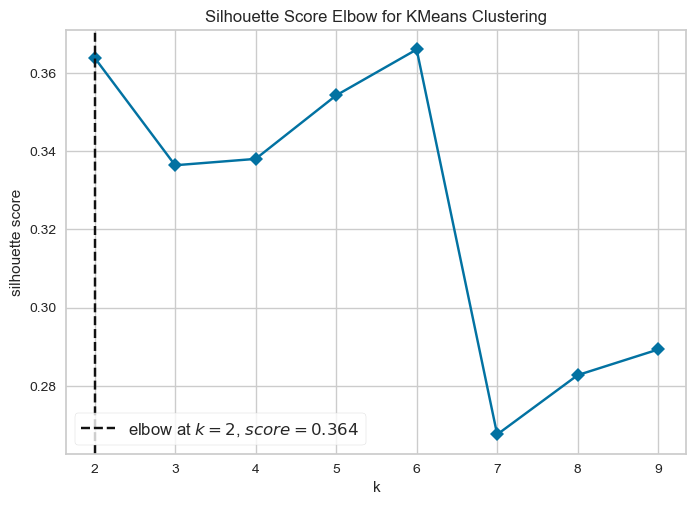

Model 2 results:
12263.838671617359


In [21]:
# KMeans Clustering.
# How many numbers of cluster. Also deciding which transformation data we will use to build model.
# Method1:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate scikit-learn K-Means models
model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=20)

# Visualize model 1 (without n_jobs argument)
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer1.fit(pca_std_df)
visualizer1.show()  # This line now displays the elbow plot for model1

print('Model 1 results:')
print(model1.inertia_)  # Inertia of the clusters

# Visualize model 2
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
visualizer2.fit(pca_std_df)
visualizer2.show()

print('Model 2 results:')
print(model2.inertia_)

In [22]:
# Conclusion:
# Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.
# Also it is proved that even if we feed data either PCA or scaled data outliers will always affect in kmeans clustering. Also when random_state value, max_iter number n_int chnaged the clustering numbers changed.
# So before using KMeans clustering it is better to have discussion or decision on outliers.

In [23]:
# Method 2
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)
# Conclusion:
# By taking standardize data pca it gives number of cluster =8 with silhoette score = 0.36

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.36388425292808524


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.33691862247134613


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.3380305205283622


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.36732074697534295


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.3661997147699144


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.26755358593238954


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.2732935584826842


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.27243478060744325


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

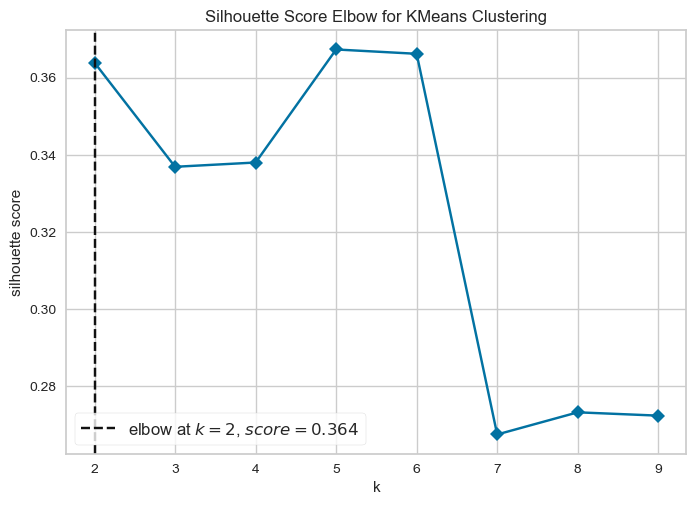

Model 1 results:
12276.617228659456


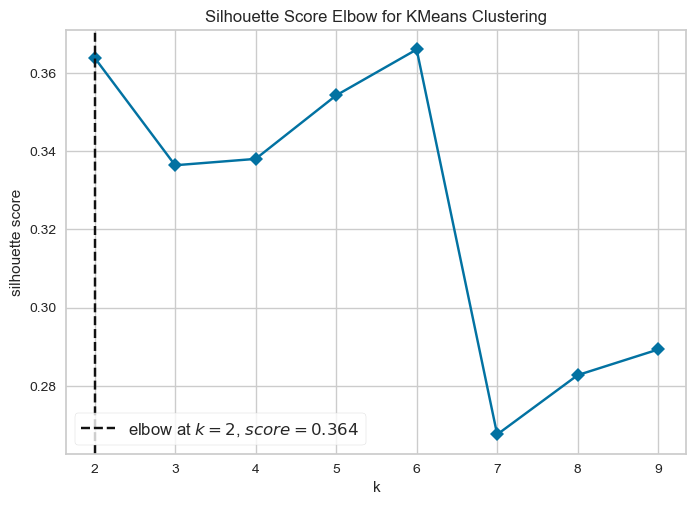

Model 2 results:
12263.838671617359


In [24]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate scikit-learn K-Means models
model1 = KMeans(random_state=0)
model2 = KMeans(random_state=10, max_iter=500, n_init=20)

# Visualize model 1 (without n_jobs argument)
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer1.fit(pca_std_df)
visualizer1.show()  # This line now displays the elbow plot for model1

print('Model 1 results:')
# Optional: Print the inertia (sum of squared distances to cluster centers) or silhouette score of model1
print(model1.inertia_)  # Inertia of the clusters

# Visualize model 2
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
visualizer2.fit(pca_std_df)
visualizer2.show()

print('Model 2 results:')
# Optional: Print the inertia or silhouette score of model2
print(model2.inertia_)

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt  # Optional for visualization

# Define a function to perform KMeans clustering and evaluation
def evaluate_kmeans(n_clusters, pca_data, model_name="KMeans"):
  """
  Performs KMeans clustering for a given number of clusters, calculates silhouette score,
  and optionally visualizes the elbow plot.

  Args:
      n_clusters: Number of clusters for KMeans.
      pca_data: Preprocessed data (e.g., pca_std_df or pca_minmax_df).
      model_name: Name of the model for printing results (default: "KMeans").
  """
  # Create KMeans object with appropriate random state and potential parallelization
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)  # Set random state for reproducibility
  # Consider using n_jobs=-1 for potential parallelization, but be aware of resource limitations

  # Perform KMeans clustering
  cluster_labels = kmeans.fit_predict(pca_data)

  # Calculate silhouette score
  silhouette_score_val = silhouette_score(pca_data, cluster_labels)

  # Print results
  print(f"{model_name} (n_clusters={n_clusters}):")
  print(f"Silhouette score: {silhouette_score_val:.4f}")

# List of cluster numbers to evaluate (always starting from 2)
cluster_list = range(2, 11)  # Explore a range from 2 to 10 clusters

# Evaluate KMeans for each cluster number using the defined function
for num_clusters in cluster_list:
  evaluate_kmeans(num_clusters, pca_minmax_df)

# Optional elbow plot visualization
# Consider using grid search or other techniques for hyperparameter tuning
# visualize_elbow_plot(kmeans, pca_minmax_df)  # Function to be implemented

# Function for elbow plot visualization (optional)
def visualize_elbow_plot(kmeans, pca_data):
  """
  Visualizes the elbow plot to help determine the optimal number of clusters.

  Args:
      kmeans: KMeans object used for clustering.
      pca_data: Preprocessed data (e.g., pca_std_df or pca_minmax_df).
  """
  from yellowbrick.cluster import KElbowVisualizer
  visualizer = KElbowVisualizer(kmeans, k=cluster_list, metric='silhouette', timings=False)
  visualizer.fit(pca_data)
  visualizer.poof()
  plt.show()

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=2):
Silhouette score: 0.4994


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=3):
Silhouette score: 0.4309


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=4):
Silhouette score: 0.4056


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=5):
Silhouette score: 0.4066


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=6):
Silhouette score: 0.3624


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=7):
Silhouette score: 0.3734


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=8):
Silhouette score: 0.3765


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=9):
Silhouette score: 0.3914


C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans (n_clusters=10):
Silhouette score: 0.3864


In [26]:
# Conclusion:
# By taking pca_minmax_df data it gives minimum number of cluster =4 with silhoette score = 0.1476
# If we check silhouette score with standardize data pca kmeans model 0.36>0.14 So we will PCA which is applied on normalizatied data. Since the score is very less. Best score alwways close to +1.

In [27]:
#  Run K-Means:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(3998,)

In [28]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[ 1.39748934e+00, -1.00268097e+00, -7.93484050e-02,
         9.64768776e-02, -2.55462869e-01, -2.45956963e-01,
        -6.93778852e-02, -2.00115332e-02],
       [-1.04319398e+00,  2.61041411e-01, -1.57612171e-02,
        -8.63097775e-02, -5.29466025e-02,  1.40904253e-01,
         5.55507409e-02,  9.06630967e-04],
       [ 4.25109821e+00,  4.10846216e+00,  1.48225282e-01,
        -2.15049963e-01, -6.18162419e-01,  4.99985948e-01,
        -5.25368013e-02,  1.44197722e-01],
       [ 4.70500770e-02,  1.06808003e+00,  3.90039130e+00,
         7.28430925e+00,  3.55116249e+00, -6.83171931e-01,
         2.01608889e-01,  2.39308121e-01],
       [ 4.35198553e+00, -3.63273099e+00,  8.67283744e+00,
        -7.26774890e+00,  7.22573764e+00,  6.83389185e+00,
         1.10087673e-01, -3.57775535e-01],
       [ 1.00862213e+00,  1.64539492e+00, -3.00059778e+00,
        -1.50667610e+00,  4.87404755e+00, -2.83568591e+00,
        -8.15939604e-01, -2.42671738e-02]])

In [31]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16715.267782950898

In [32]:
model1.score(pca_std_df) 

# it is opposite value of sum of squared value..avoid to use it. It is bit confusing

-16715.267782950898

In [33]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

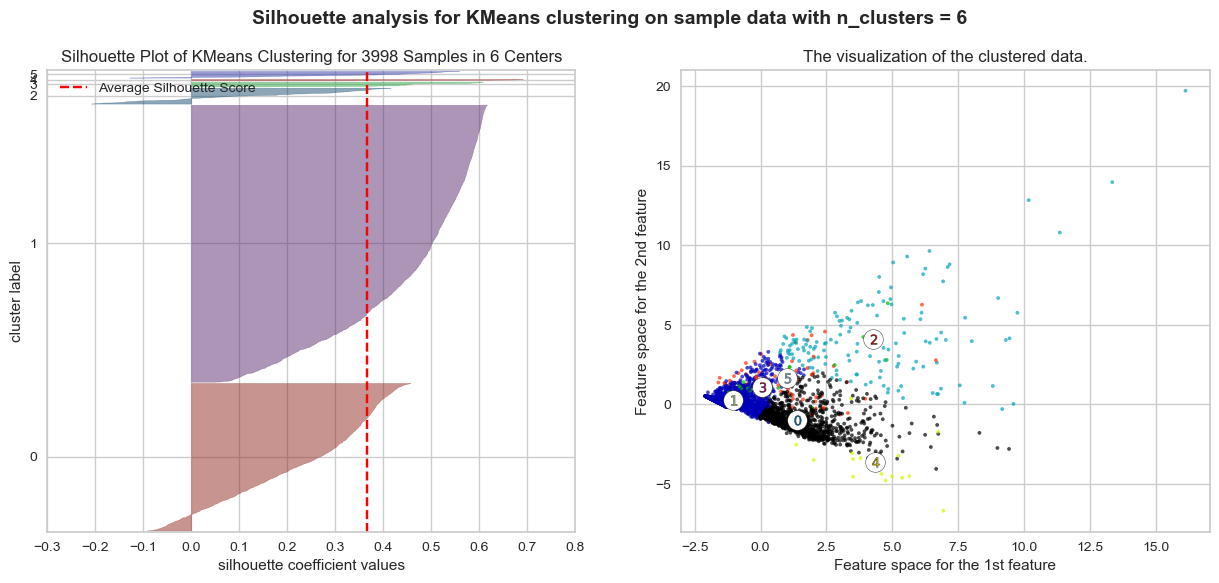

In [34]:
# visualizing silhoutte score..for different cluster
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [35]:
# Putting Cluster lables into original dataset And analysis of the same
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [36]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([data.copy(), model1_cluster], axis=1)
Kmeans_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0


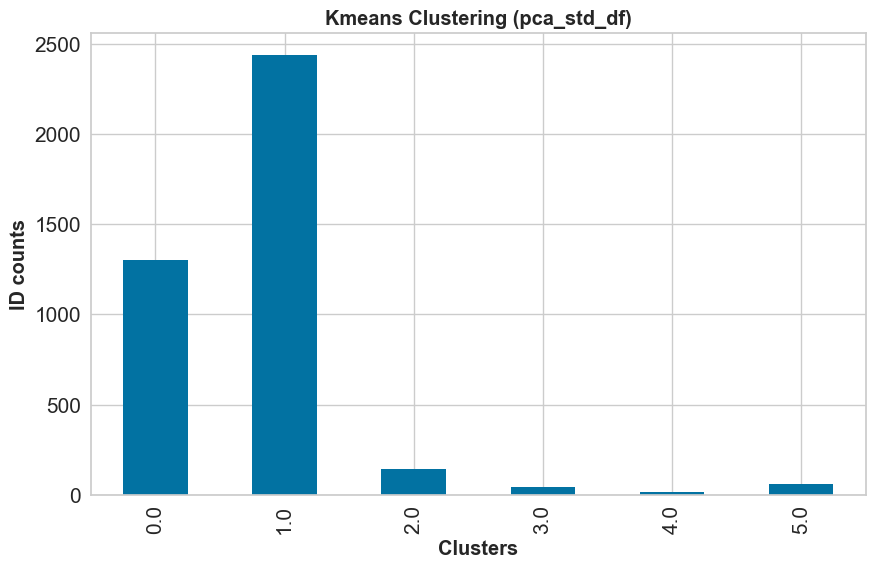

In [58]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


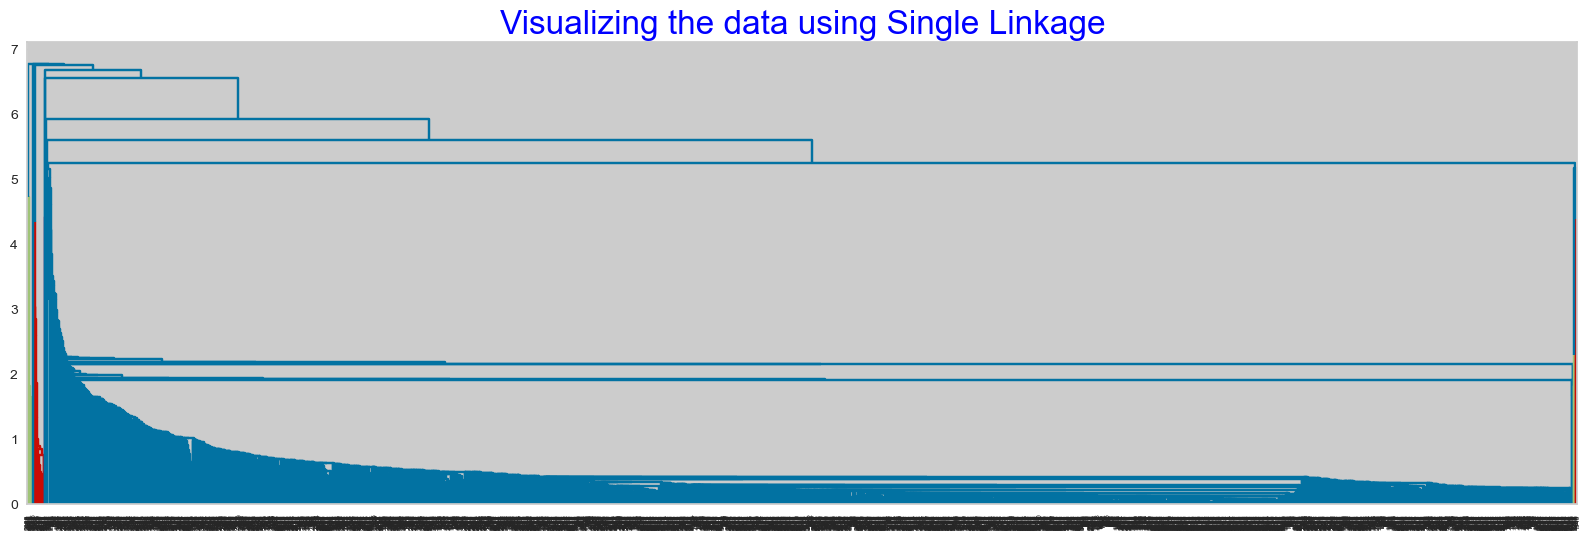

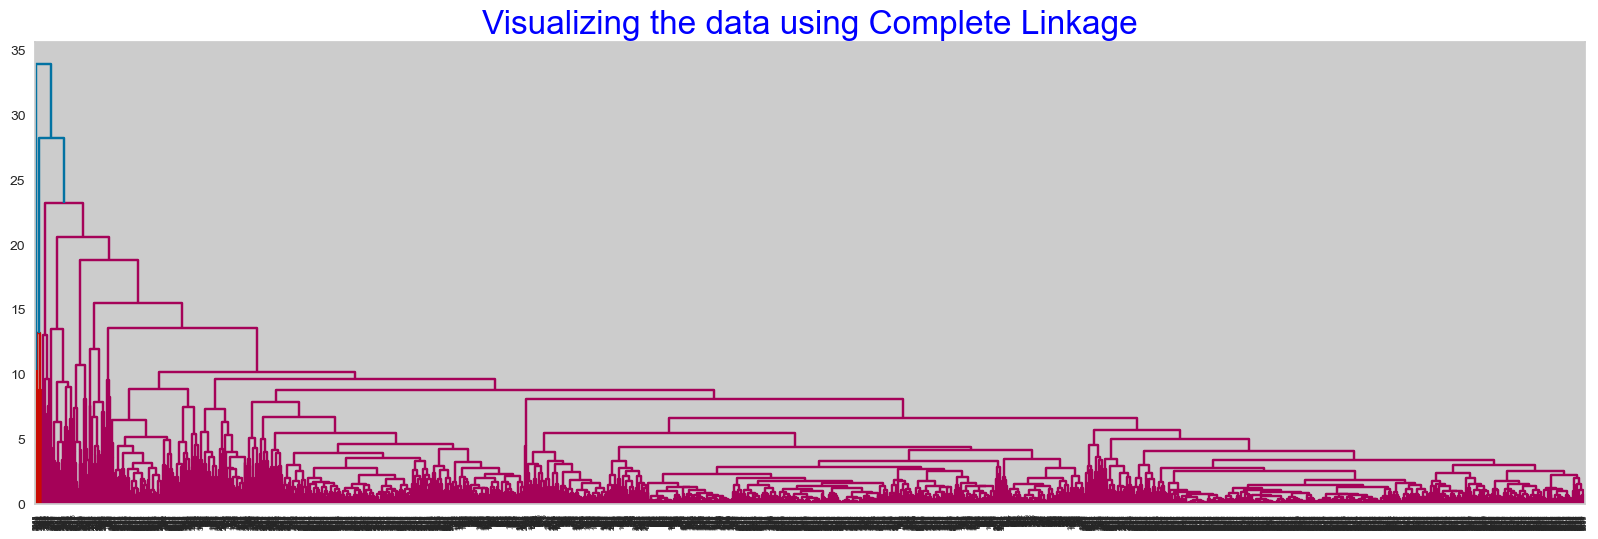

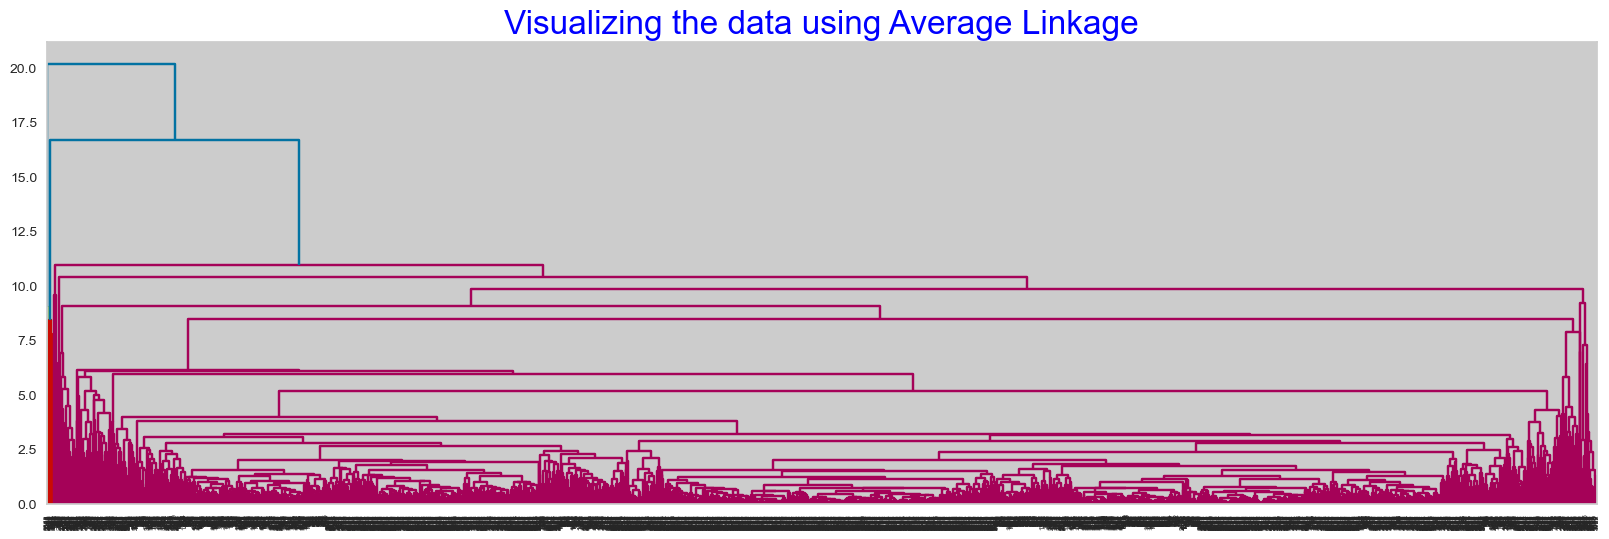

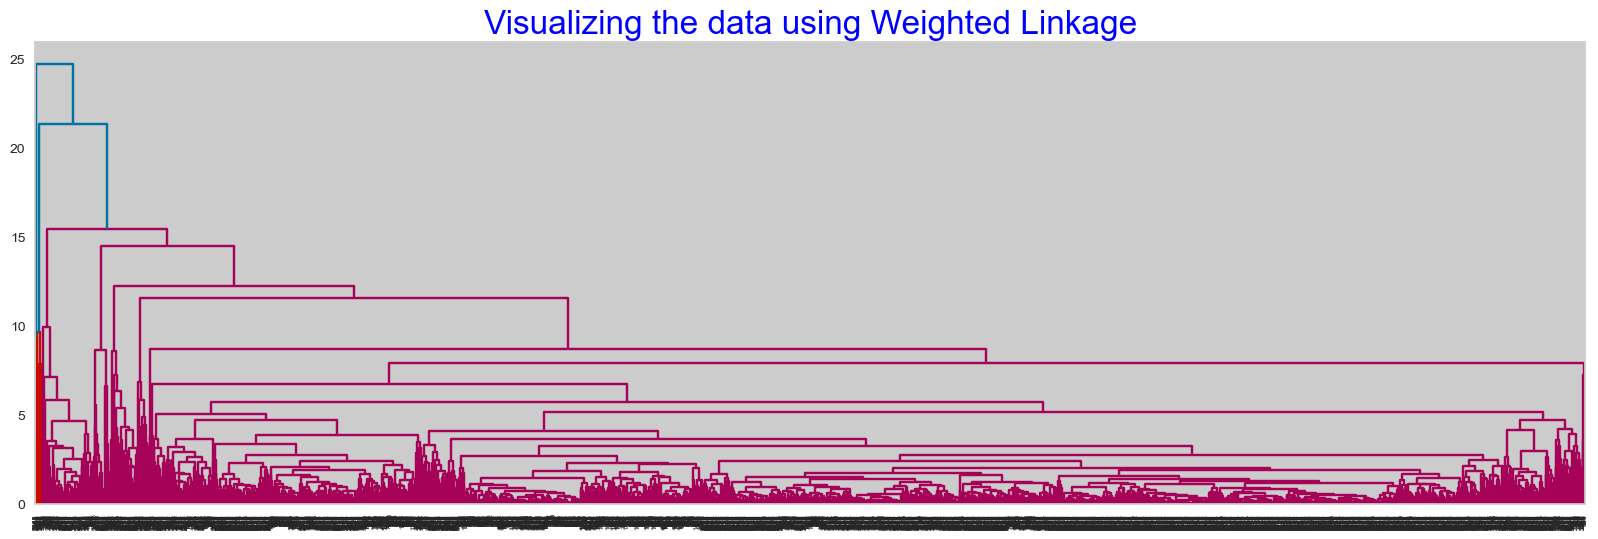

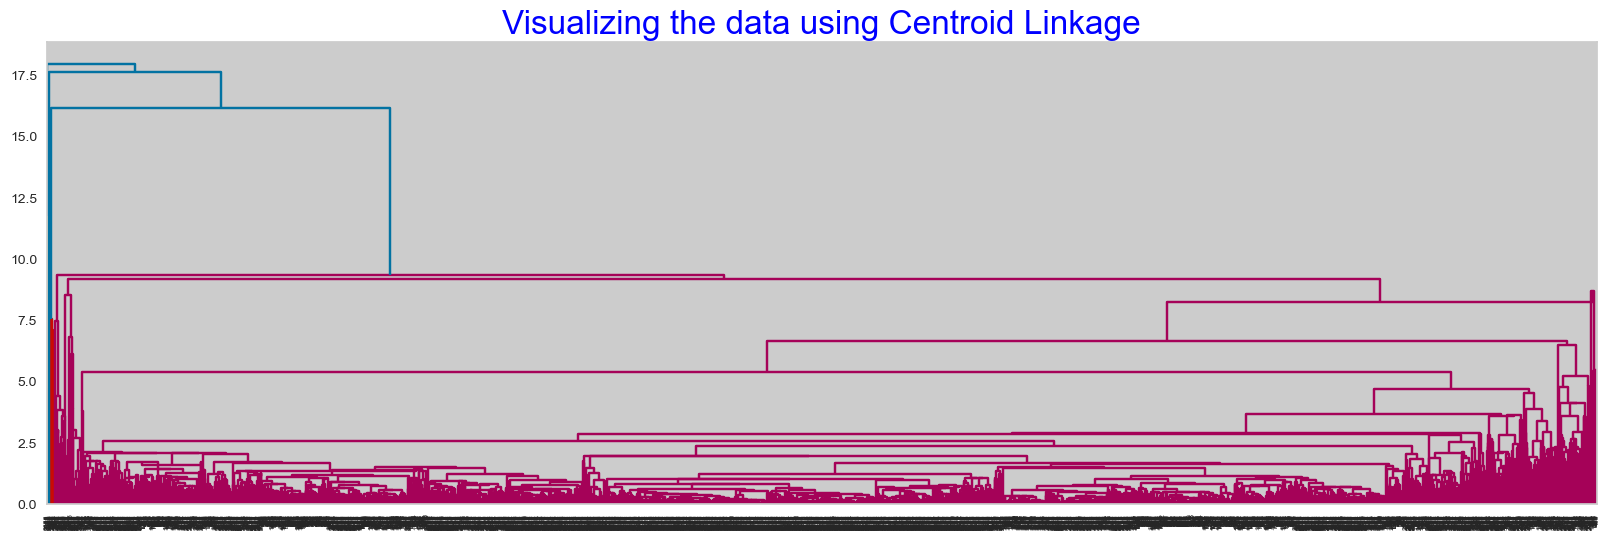

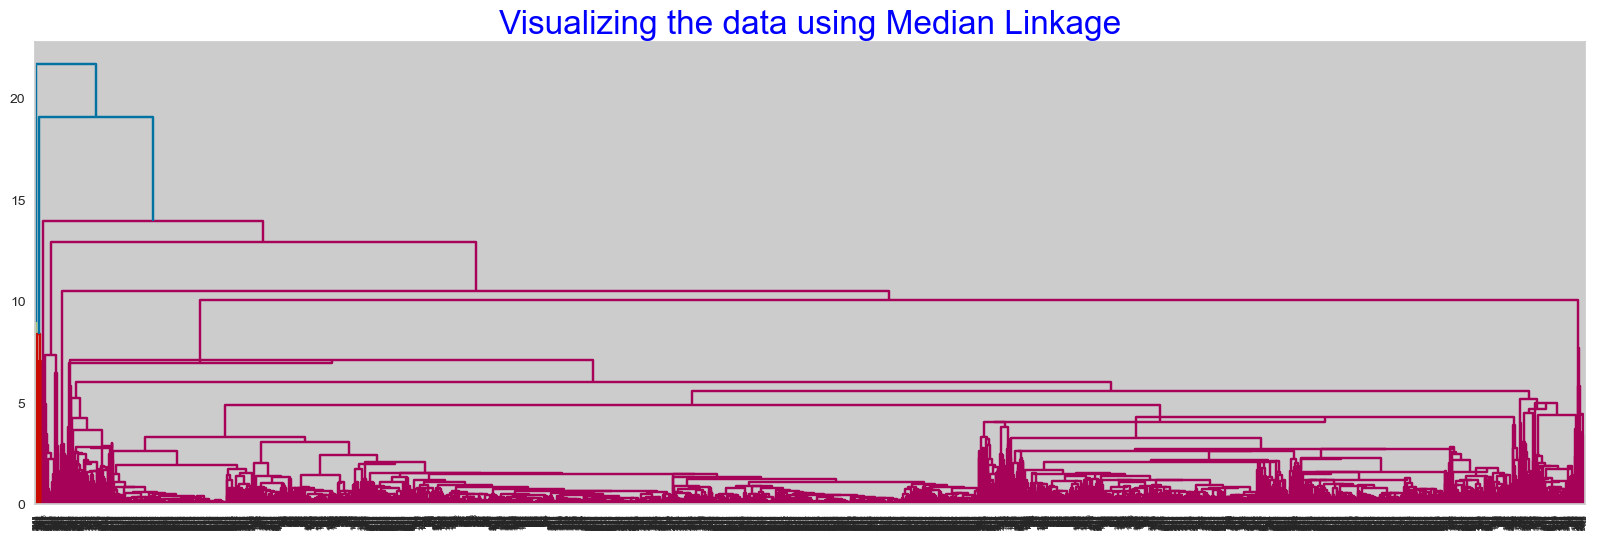

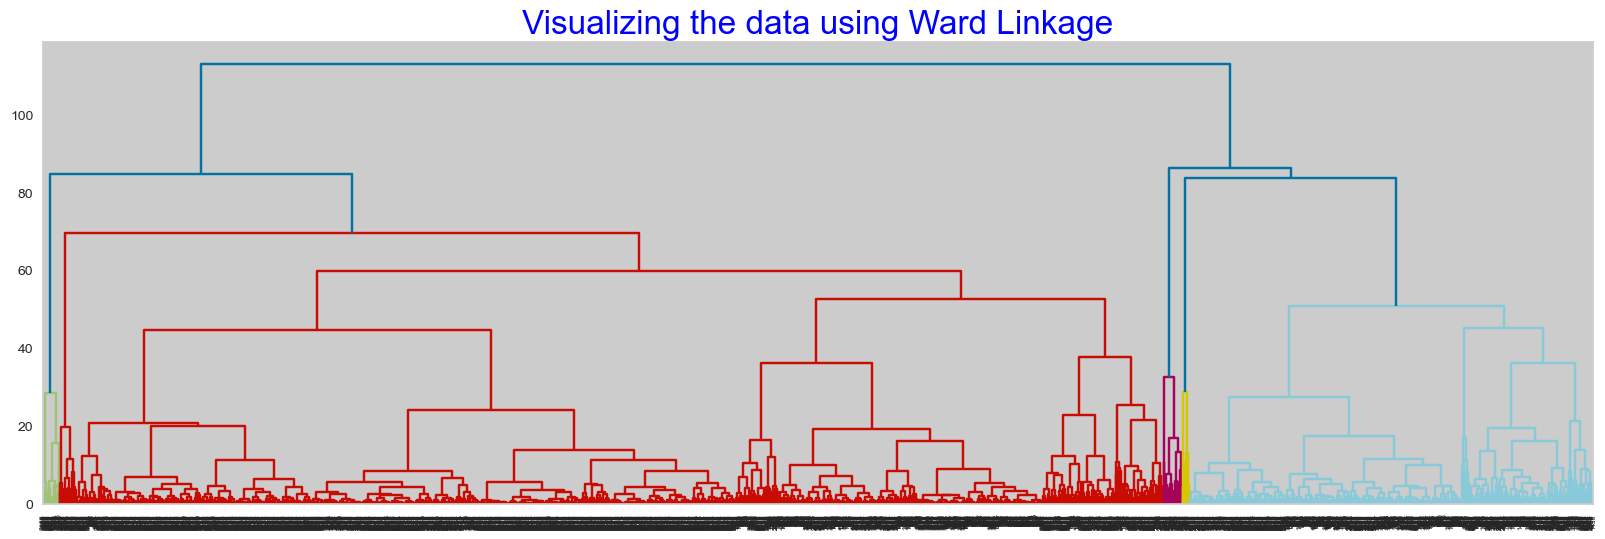

In [59]:
# Hierarchical Clustering Algorithm
# Method1: By using Dendrogram
# Applying Dendrogram on PCA data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Define methods for easier iteration
methods_list = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

# Loop through each method
for method in methods_list:
  plt.figure(figsize=(20, 6))

  # Define formatting dictionary for title
  title_dict = {'fontsize': 24, 'fontweight': 16, 'color': 'blue'}

  # Create title string
  title = f"Visualizing the data using {method.capitalize()} Linkage"
  plt.title(title, fontdict=title_dict)  # Capitalize the method name

  # Perform hierarchical clustering and plot dendrogram
  dendrogram(linkage(pca_std_df, method=method, optimal_ordering=False))

  plt.show()  # Show the plot after each iteration



In [39]:
# Method 2: Silhouette Score method
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()
# Conclusion: Although max score is with cluster numbers 4. I have selected tcluster number = 5

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.31386599281993516
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8258168010381199
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8258168010381199
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7595214746173459

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.30986162762686037
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7965496055548389
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7965496055548389
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7592565781135314

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3281591058720655
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6568682265603591
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6939833303038405
For

In [40]:
# Second Stage: Taking MinMax transformation data & PCA applied on it.
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()
    
# Conclusion: dataset with MinMax transformation & PCA applied on it doesn't imporoved score here. So i am taking previous cell code conclusion.

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4525909167219793
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5857673282516337
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5003737147675541
For n_clusters = 2 The average silhouette_score with linkage- single : 0.6060974676893732

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3737950690135146
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4542457177506997
For n_clusters = 3 The average silhouette_score with linkage- average : 0.45061092391618995
For n_clusters = 3 The average silhouette_score with linkage- single : 0.502923646119325

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.36536091159453127
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4561173513019074
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3946164186397717
For 

In [41]:
# Run Hierarchical Clustering.(Agglomerative Clustering)
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# Cluster numbers

agg_clustering.n_clusters_

5

In [43]:
# cluster labels for each point

agg_clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# Number of leaves in the hierarchical tree.

agg_clustering.n_leaves_

3998

In [45]:
# The estimated number of connected components in the graph.

agg_clustering.n_connected_components_

1

In [46]:
agg_clustering.children_

array([[1826, 2121],
       [2678, 2679],
       [3491, 3997],
       ...,
       [7989, 7991],
       [7984, 7992],
       [7986, 7993]])

In [47]:
# Clustering Score

(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

66.8

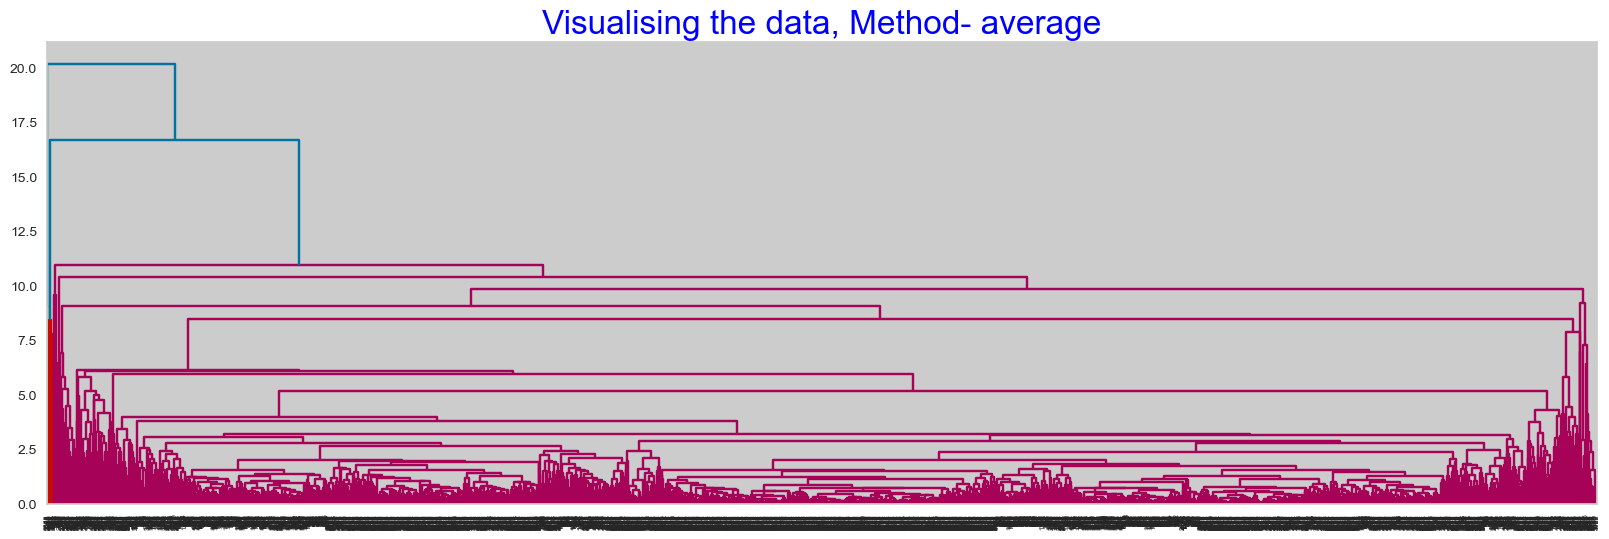

In [48]:
# Plotting Dendrogram.

import scipy.cluster.hierarchy as shc
for methods in ['average']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram2 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [49]:
# Putting Cluster lables into original dataset And analysis of the same
# Creating dataframe of cluster lables..

hie_cluster = pd.DataFrame(agg_clustering.labels_.copy(), columns=['Hie_Clustering'])

In [50]:
# Concating model1_Cluster df with main dataset copy

hie_df = pd.concat([data.copy(), hie_cluster], axis=1)
hie_df .head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hie_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0


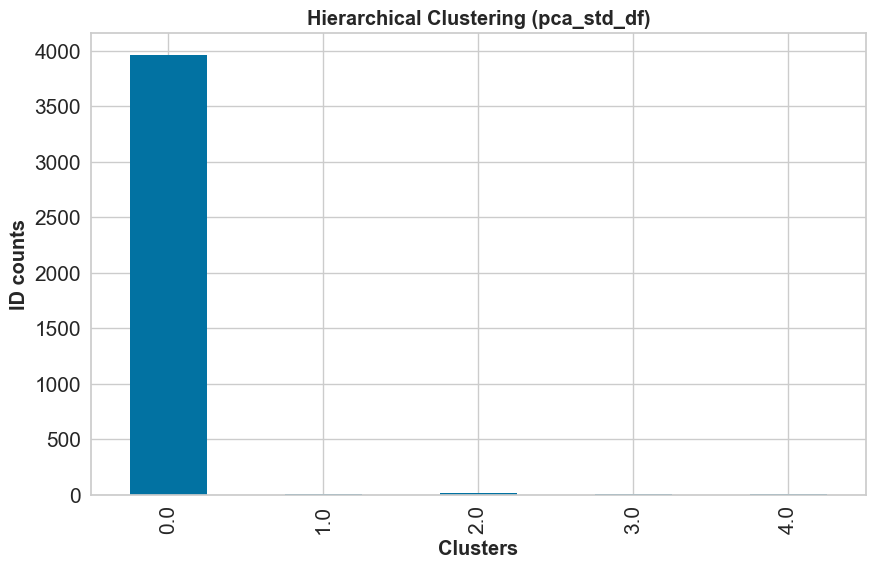

In [51]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
hie_df.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [52]:
# Conclusion Between Kmeans & Hierarchical
Kmeans_df.groupby(['Kmeans_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Kmeans_Clustering,,,,,,,,,,,,
0.0,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
1.0,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
2.0,141,141,141,141,141,141,141,141,141,141,141,141
3.0,43,43,43,43,43,43,43,43,43,43,43,43
4.0,15,15,15,15,15,15,15,15,15,15,15,15
5.0,59,59,59,59,59,59,59,59,59,59,59,59


In [53]:
hie_df.groupby(['Hie_Clustering']).count()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Hie_Clustering,,,,,,,,,,,,
0.0,3964,3964,3964,3964,3964,3964,3964,3964,3964,3964,3964,3964
1.0,10,10,10,10,10,10,10,10,10,10,10,10
2.0,15,15,15,15,15,15,15,15,15,15,15,15
3.0,4,4,4,4,4,4,4,4,4,4,4,4
4.0,5,5,5,5,5,5,5,5,5,5,5,5


In [54]:
# Conclusion: We will go with Kmeans Clustering Since in hierarchiacl clustering all data is gathherd in one cluster only.


In [ ]:
# DBSCAN
# #as given in problem, we have to assign values for column names - "cc1_miles" , "cc2_miles" , "cc3_miles" as follows :
#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over 50,000

#for each case  : miles value can be anything in the range 0 to 5000; i have no idea; 
#lets take median value for each case

#1 = 2500
#2 = 7500
#3 = 17500
#4 = 37500
#5 = 75000

In [56]:
# Create and Append Array

array([1, 3, 2, 4, 5], dtype=int64)

In [60]:
array=dataset1.values
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [61]:
# Scaling of DATA. Apply standarised Scaling
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [62]:
X

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01,  1.39523468e+00],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01,  1.37973643e+00],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01,  1.41170157e+00],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.28648790e-01, -3.62219103e-01, -1.31599028e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
         2.84455375e-02, -9.85832074e-02, -1.31647460e+00],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01, -1.31792757e+00]])

In [63]:
# Apply DBSCAN to find the nearest neighbour and the K Distance
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

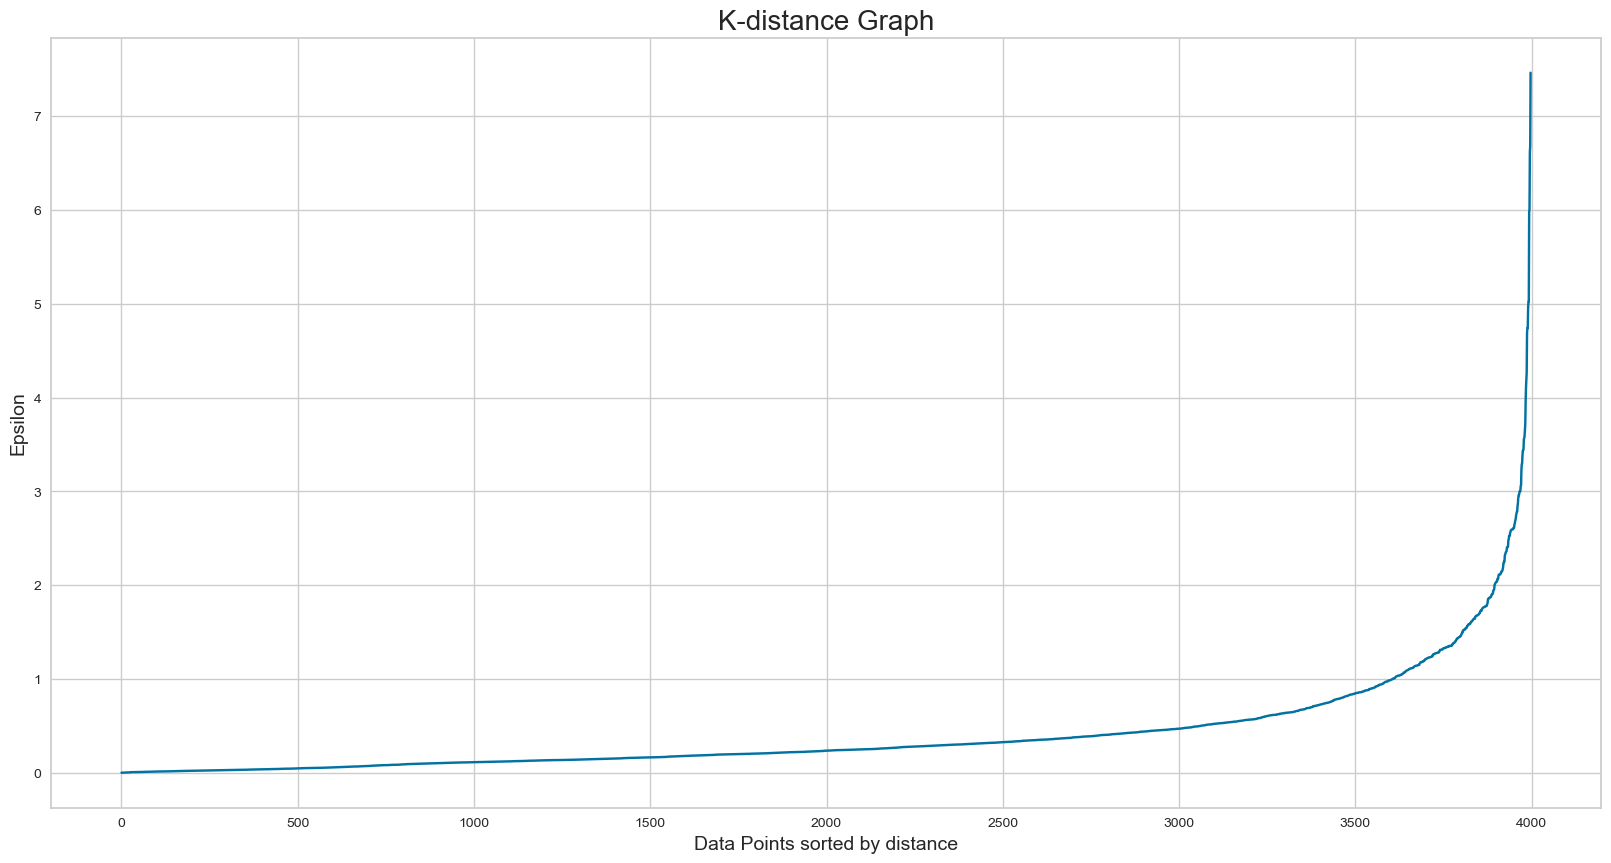

In [64]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [66]:
# Elbow seems to be at 2. hence let take the EPSILON at 2. Epsilon can be taken anywhere within 3
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

dbscan = DBSCAN(eps=2, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=12)

In [67]:
# Noisy samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
dataset1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [70]:
# Add Clusters to the original dataset
dataset1['Cluster no']=pd.DataFrame(dbscan.labels_)
dataset1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster no
0,28143,0,1,1,1,174,1,0,0,7000,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0.0
4,97752,0,4,1,1,43300,26,2077,4,6935,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0.0
3995,64385,0,1,1,1,981,5,0,0,1395,0.0
3996,73597,0,3,1,1,25447,8,0,0,1402,0.0
3997,54899,0,1,1,1,500,1,500,1,1401,0.0


In [71]:
# Check the values under each Clusters
dataset1['Cluster no'].value_counts()
## -1 Values are the OUTLIERS

Cluster no
 0.0    3770
-1.0     192
 1.0      23
 2.0      12
Name: count, dtype: int64

In [72]:
# check the accuracy of the Cluster
metrics.silhouette_score
metrics.silhouette_score(X,dbscan.labels_)

0.5814964632201987

In [73]:
# Check the mean of the Clusters to draw inferences
dataset1.groupby('Cluster no').agg('mean').T

Cluster no,-1.0,0.0,1.0,2.0
Balance,243604.005208,65286.116446,39546.086957,43125.416667
Qual_miles,1740.427083,64.231300,0.000000,0.000000
cc1_miles,2.838542,2.030239,1.000000,1.000000
cc2_miles,1.057292,1.000265,1.956522,3.000000
cc3_miles,1.255208,1.000000,1.000000,1.000000
Bonus_miles,52032.432292,15433.468170,8772.826087,15505.250000
Bonus_trans,26.682292,10.818037,13.347826,15.166667
Flight_miles_12mo,3611.427083,302.087268,221.739130,200.000000
Flight_trans_12,10.687500,0.906366,0.782609,0.500000
Days_since_enroll,4934.906250,4079.765517,3846.347826,4203.333333


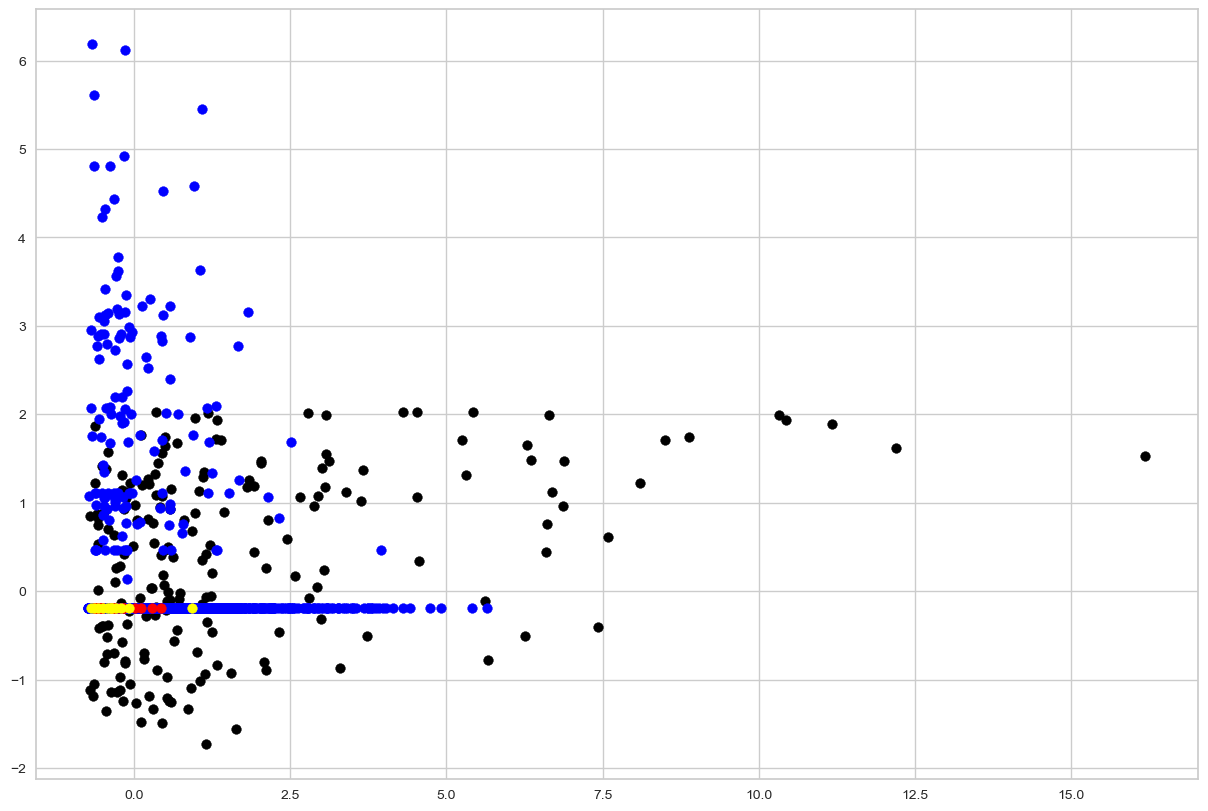

In [75]:
# Lets Visualize the Cluster using Scatter Plot
# Visualization Including the OUTLIERS, which are shown as -1 in BLACK Color

plt.figure(figsize=(15,10))
plt.scatter(X[dbscan.labels_ == -1,0], X[dbscan.labels_ == -1,-1], c = 'black')
plt.scatter(X[dbscan.labels_ == 0,0], X[dbscan.labels_ == 0,1], c = 'blue')
plt.scatter(X[dbscan.labels_ == 1,0], X[dbscan.labels_ == 1,1], c = 'red')
plt.scatter(X[dbscan.labels_ == 2,0], X[dbscan.labels_ == 2,1], c = 'yellow')
plt.show()

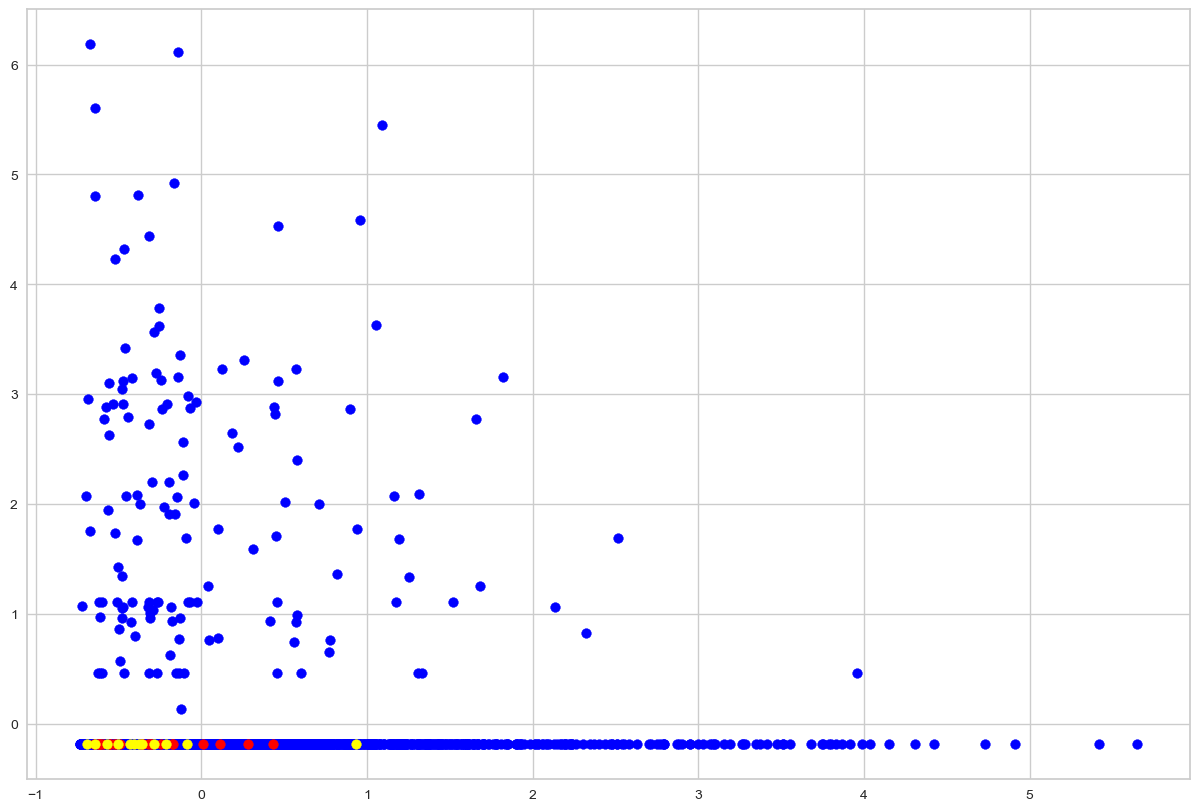

In [76]:
# Visualization EXcluding the OUTLIERS.

plt.figure(figsize=(15,10))
plt.scatter(X[dbscan.labels_ == 0,0], X[dbscan.labels_ == 0,1], c = 'blue')
plt.scatter(X[dbscan.labels_ == 1,0], X[dbscan.labels_ == 1,1], c = 'red')
plt.scatter(X[dbscan.labels_ == 2,0], X[dbscan.labels_ == 2,1], c = 'yellow')
plt.show()